In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


# DATA ANALYSIS

In [3]:

df = pd.read_csv("diabetes_dataset.csv")

df.info()
df.head()

df.isnull().sum()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 9538 non-null   int64  
 1   Pregnancies         9538 non-null   int64  
 2   BMI                 9538 non-null   float64
 3   Glucose             9538 non-null   float64
 4   BloodPressure       9538 non-null   float64
 5   HbA1c               9538 non-null   float64
 6   LDL                 9538 non-null   float64
 7   HDL                 9538 non-null   float64
 8   Triglycerides       9538 non-null   float64
 9   WaistCircumference  9538 non-null   float64
 10  HipCircumference    9538 non-null   float64
 11  WHR                 9538 non-null   float64
 12  FamilyHistory       9538 non-null   int64  
 13  DietType            9538 non-null   int64  
 14  Hypertension        9538 non-null   int64  
 15  MedicationUse       9538 non-null   int64  
 16  Outcom

Age  Pregnancies          BMI      Glucose  BloodPressure  \
count  9538.000000  9538.000000  9538.000000  9538.000000    9538.000000   
mean     53.577584     7.986161    27.052364   106.104183      84.475781   
std      20.764651     4.933469     5.927955    21.918590      14.123480   
min      18.000000     0.000000    15.000000    50.000000      60.000000   
25%      36.000000     4.000000    22.870000    91.000000      74.000000   
50%      53.000000     8.000000    27.050000   106.000000      84.000000   
75%      72.000000    12.000000    31.180000   121.000000      94.000000   
max      89.000000    16.000000    49.660000   207.200000     138.000000   

             HbA1c          LDL          HDL  Triglycerides  \
count  9538.000000  9538.000000  9538.000000    9538.000000   
mean      4.650661   100.133456    49.953418     151.147746   
std       0.476395    29.911910    15.242194      48.951627   
min       4.000000   -12.000000    -9.200000      50.000000   
25%       4.300000    80.100000    39.700000     117.200000   
50%       4.600000    99.900000    50.200000     150.550000   
75%       5.000000   120.200000    60.200000     185.100000   
max       6.900000   202.200000   107.800000     345.800000   

       WaistCircumference  HipCircumference          WHR  FamilyHistory  \
count         9538.000000       9538.000000  9538.000000    9538.000000   
mean            93.951678        103.060621     0.917400       0.302474   
std             15.594468         13.438827     0.140828       0.459354   
min             40.300000         54.800000     0.420000       0.000000   
25%             83.400000         94.000000     0.820000       0.000000   
50%             93.800000        103.200000     0.910000       0.000000   
75%            104.600000        112.100000     1.010000       1.000000   
max            163.000000        156.600000     1.490000       1.000000   

          DietType  Hypertension  MedicationUse      Outcome  
count  9538.000000   9538.000000    9538.000000  9538.000000  
mean      0.486161      0.001048       0.405012     0.344097  
std       0.661139      0.032364       0.490920     0.475098  
min       0.000000      0.000000       0.000000     0.000000  
25%       0.000000      0.000000       0.000000     0.000000  
50%       0.000000      0.000000       0.000000     0.000000  
75%       1.000000      0.000000       1.000000     1.000000  
max       2.000000      1.000000       1.000000     1.000000

In [4]:
# Vérification des valeurs manquantes
missing_values = df.isnull().sum()

# Vérification de la distribution de la variable cible
class_distribution = df['Outcome'].value_counts(normalize=True) * 100

missing_values, class_distribution


(Age                   0
 Pregnancies           0
 BMI                   0
 Glucose               0
 BloodPressure         0
 HbA1c                 0
 LDL                   0
 HDL                   0
 Triglycerides         0
 WaistCircumference    0
 HipCircumference      0
 WHR                   0
 FamilyHistory         0
 DietType              0
 Hypertension          0
 MedicationUse         0
 Outcome               0
 dtype: int64,
 Outcome
 0    65.59027
 1    34.40973
 Name: proportion, dtype: float64)

/var/folders/t6/j8g_7ls97b9gdfqfkc7p75q80000gn/T/ipykernel_61833/2475061392.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")


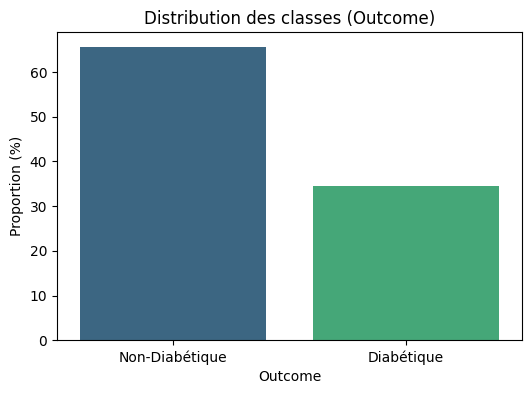

Outcome
0    65.59027
1    34.40973
Name: proportion, dtype: float64

In [5]:
# Distribution des classes (Outcome)
class_distribution = df['Outcome'].value_counts(normalize=True) * 100

# Affichage des proportions
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")
plt.xticks([0, 1], ["Non-Diabétique", "Diabétique"])
plt.ylabel("Proportion (%)")
plt.title("Distribution des classes (Outcome)")
plt.show()

class_distribution


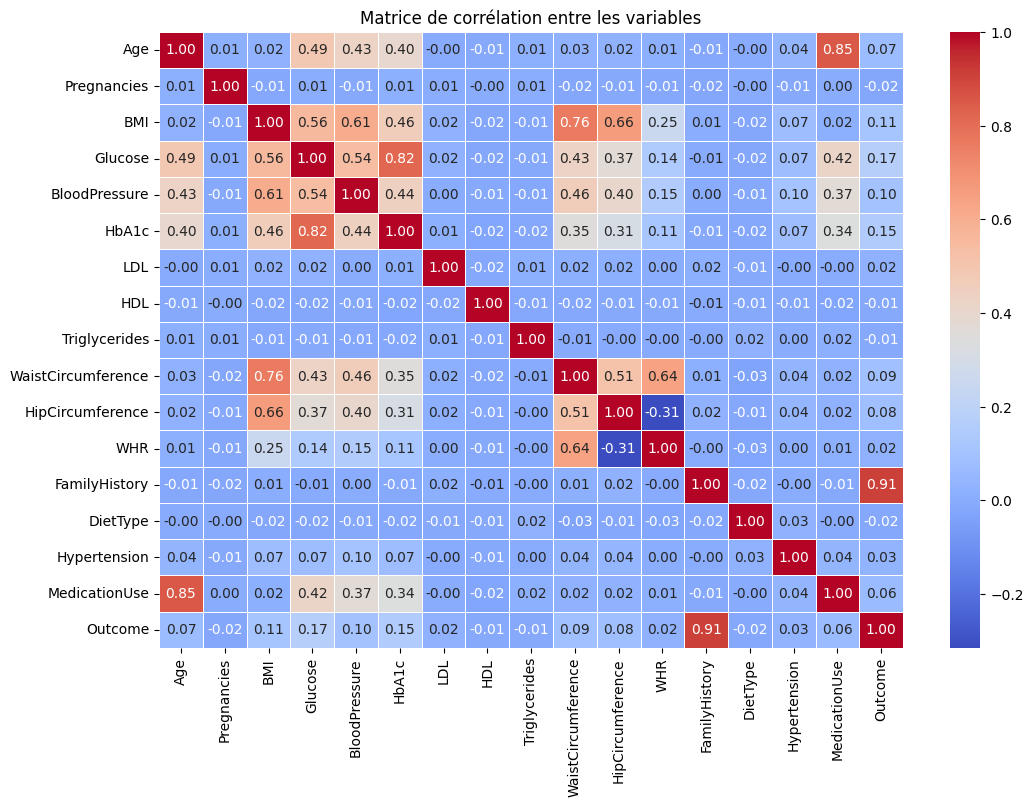

Outcome               1.000000
FamilyHistory         0.909166
Glucose               0.168325
HbA1c                 0.151506
BMI                   0.107248
BloodPressure         0.096361
WaistCircumference    0.087492
HipCircumference      0.082797
Age                   0.068453
MedicationUse         0.064626
Hypertension          0.031089
WHR                   0.021727
LDL                   0.019497
Pregnancies           0.018189
DietType              0.015549
HDL                   0.008837
Triglycerides         0.008487
Name: Outcome, dtype: float64

In [6]:
# Calcul des corrélations entre les variables
correlation_matrix = df.corr()

# Affichage de la heatmap des corrélations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corrélation entre les variables")
plt.show()

# Tri des variables les plus corrélées avec Outcome
correlation_with_target = correlation_matrix["Outcome"].abs().sort_values(ascending=False)
correlation_with_target


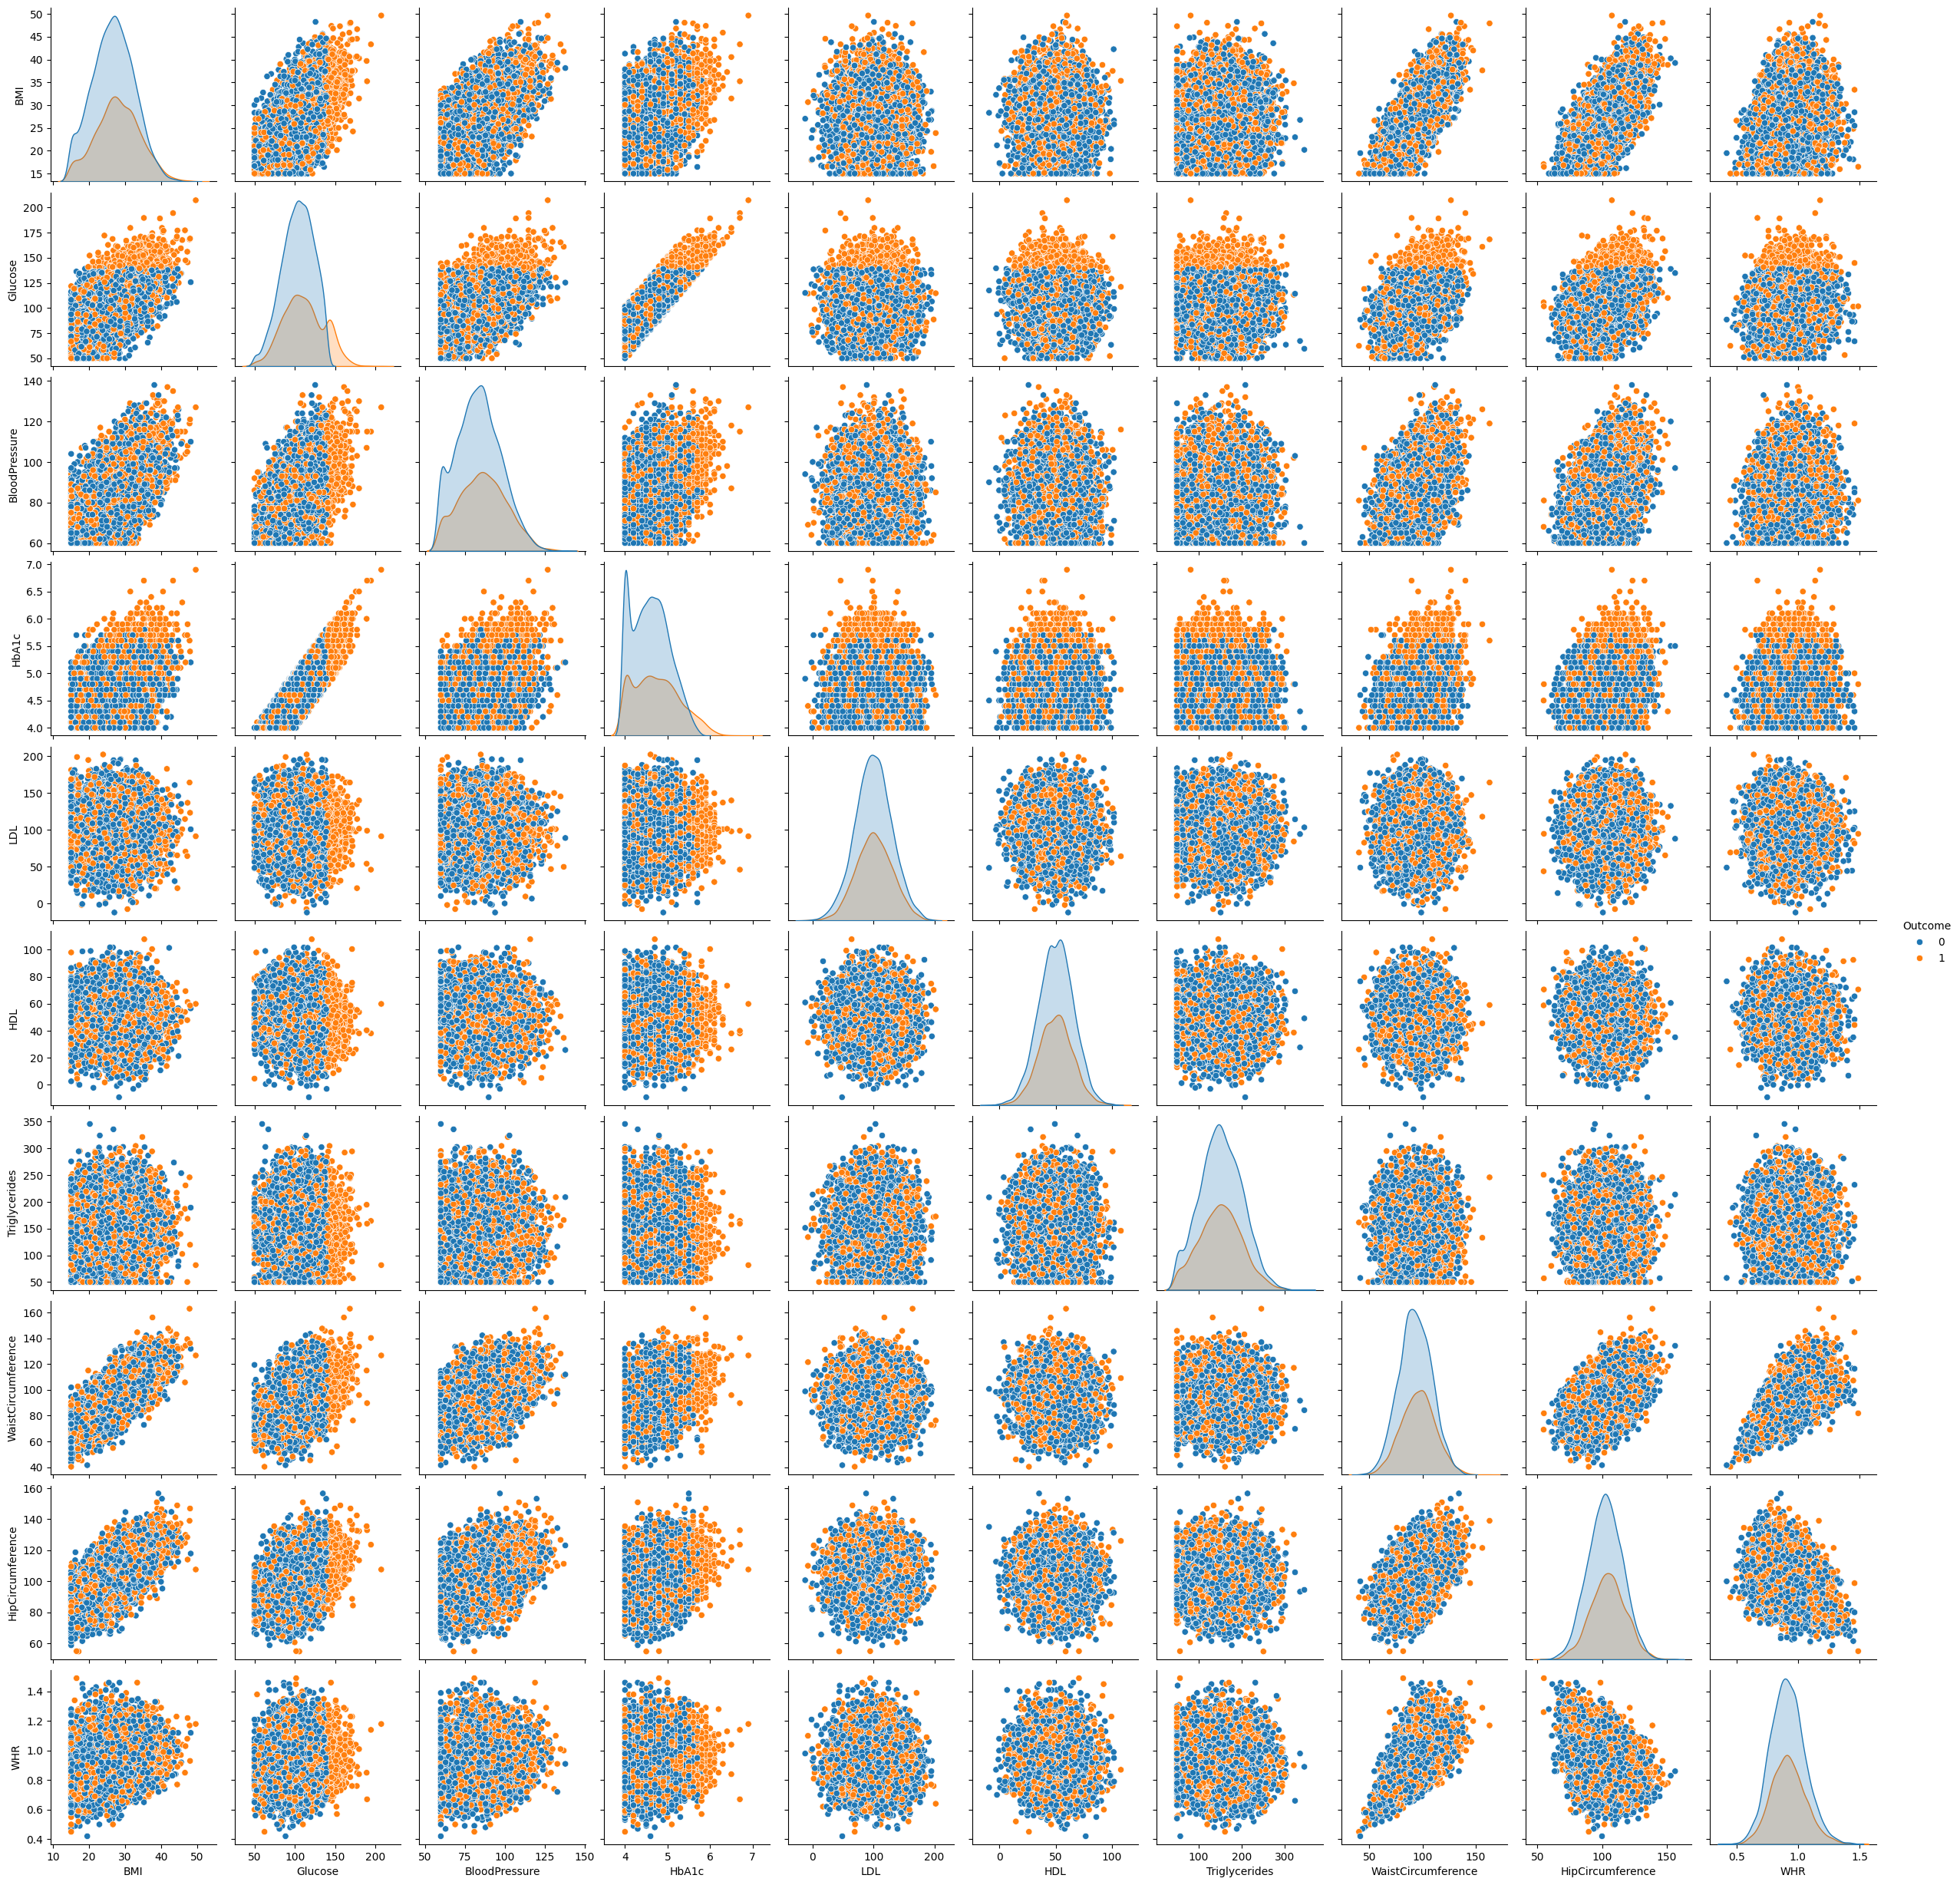

In [9]:
sns.pairplot(data=df, vars=df.select_dtypes(include='float'), hue='Outcome')
plt.show()

# FEATURE ENGINEERING

In [78]:
# Vérifier les valeurs manquantes
missing_values = df.isnull().sum()

# Création de nouvelles features
df['HDL_LDL_Ratio'] = df['HDL'] / (df['LDL'] + 1e-6)  # Éviter la division par zéro

# Catégorisation de l'IMC selon l'OMS
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df['BMI_Category'] = df['BMI'].apply(categorize_bmi)

# Catégorisation de la glycémie
def categorize_glucose(glucose):
    if glucose < 100:
        return "Normal"
    elif 100 <= glucose < 126:
        return "Pre-diabetes"
    else:
        return "Diabetes"

df['Glucose_Category'] = df['Glucose'].apply(categorize_glucose)

# One-Hot Encoding des variables catégorielles
df = pd.get_dummies(df, columns=['BMI_Category', 'Glucose_Category', 'DietType', 'MedicationUse'], drop_first=True)


In [79]:
# Convertir les colonnes booléennes en entiers (0/1)
categorical_columns = ['BMI_Category_Obese', 'BMI_Category_Overweight', 'BMI_Category_Underweight',
                       'Glucose_Category_Normal', 'Glucose_Category_Pre-diabetes', 
                       'DietType_1', 'DietType_2', 'MedicationUse_1']

df[categorical_columns] = df[categorical_columns].astype(int)



In [80]:
df

Age  Pregnancies    BMI  Glucose  BloodPressure  HbA1c    LDL   HDL  \
0      69            5  28.39    130.1           77.0    5.4  130.4  44.0   
1      32            1  26.49    116.5           72.0    4.5   87.4  54.2   
2      89           13  25.34    101.0           82.0    4.9  112.5  56.8   
3      78           13  29.91    146.0          104.0    5.7   50.7  39.1   
4      38            8  24.56    103.2           74.0    4.7  102.5  29.1   
...   ...          ...    ...      ...            ...    ...    ...   ...   
9533   32            3  23.00    102.3           62.0    4.1  109.3  47.8   
9534   74            0  24.29    125.8           93.0    5.3   95.8  66.6   
9535   75            6  26.10    107.6           75.0    5.0  168.5  62.3   
9536   52            1  25.88     99.3           96.0    4.6   70.0  48.4   
9537   33            3  25.61     69.1           65.0    4.0   69.0  59.4   

      Triglycerides  WaistCircumference  ...  Outcome  HDL_LDL_Ratio  \
0              50.0                90.5  ...        0       0.337423   
1             129.9               113.3  ...        0       0.620137   
2             177.6                84.7  ...        0       0.504889   
3             117.0               108.9  ...        1       0.771203   
4             145.9                84.1  ...        0       0.283902   
...             ...                 ...  ...      ...            ...   
9533           76.7                86.8  ...        0       0.437328   
9534          103.7                90.1  ...        1       0.695198   
9535          149.8                84.0  ...        0       0.369733   
9536          122.9                97.5  ...        1       0.691429   
9537          169.5                79.7  ...        0       0.860870   

      BMI_Category_Obese  BMI_Category_Overweight  BMI_Category_Underweight  \
0                      0                        1                         0   
1                      0                        1                         0   
2                      0                        1                         0   
3                      0                        1                         0   
4                      0                        0                         0   
...                  ...                      ...                       ...   
9533                   0                        0                         0   
9534                   0                        0                         0   
9535                   0                        1                         0   
9536                   0                        1                         0   
9537                   0                        1                         0   

      Glucose_Category_Normal  Glucose_Category_Pre-diabetes  DietType_1  \
0                           0                              0           0   
1                           0                              1           0   
2                           0                              1           0   
3                           0                              0           0   
4                           0                              1           1   
...                       ...                            ...         ...   
9533                        0                              1           0   
9534                        0                              1           0   
9535                        0                              1           0   
9536                        1                              0           0   
9537                        1                              0           1   

      DietType_2  MedicationUse_1  
0              0                1  
1              0                0  
2              0                1  
3              0                1  
4              0                0  
...          ...              ...  
9533           0                0  
9534           0                1  
9535           0              

Création de nouvelles variables :

Ratio HDL/LDL (indicateur cardiovasculaire clé).
Catégorisation de l'IMC (Normal, Surpoids, Obésité...).
Catégorisation de la glycémie (Normal, Pré-diabète, Diabète).


Encodage des variables catégorielles :
One-Hot Encoding pour IMC, Glucose, DietType, MedicationUse.

Standardisation

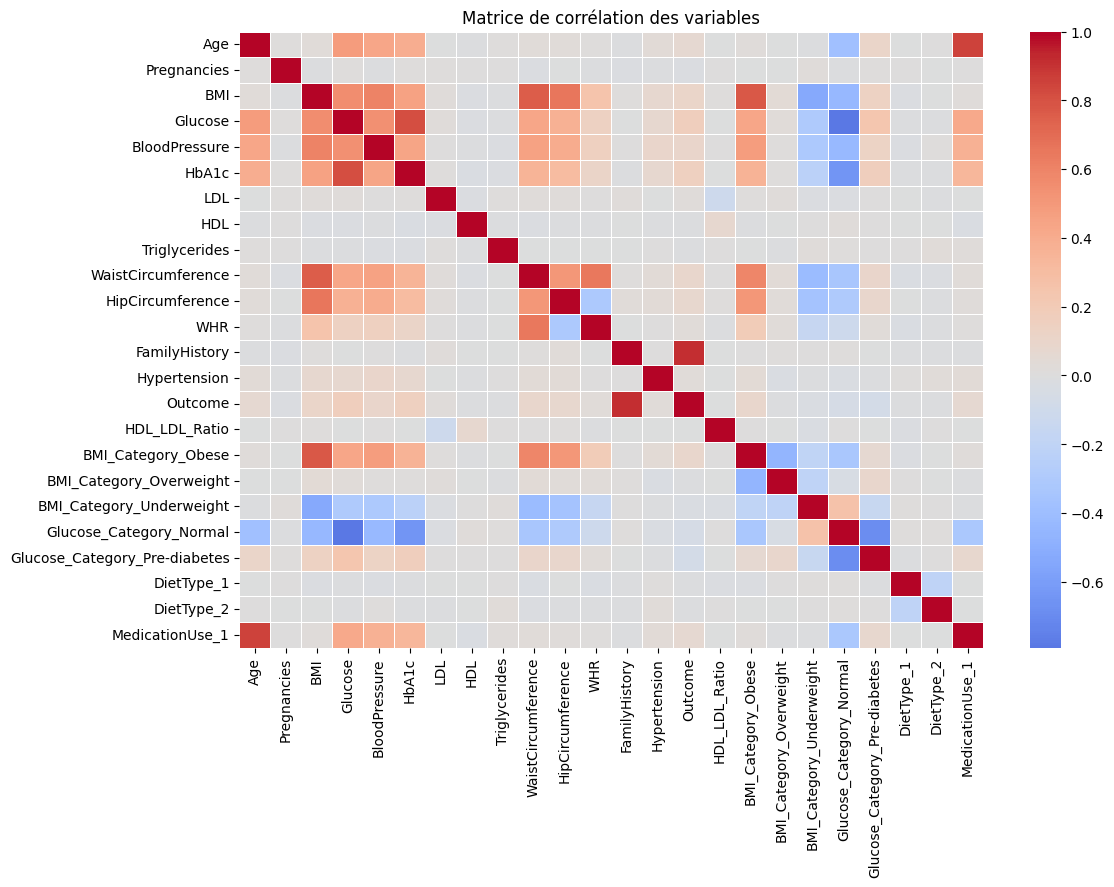

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
corr_matrix = df.corr()

# Affichage de la heatmap de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Matrice de corrélation des variables")
plt.show()


In [82]:
# Importation des bibliothèques nécessaires pour le prétraitement
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Séparation des features (X) et de la cible (y)
X = df[['Glucose', 'FamilyHistory', 'MedicationUse_1', 'BMI_Category_Obese']]  # Variables explicatives
y = df['Outcome']  # Variable cible

# Standardisation des variables numériques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation en jeu d'entraînement et de test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Vérification des dimensions
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((7630, 4), (1908, 4), (7630,), (1908,))

Standardisation : Toutes les variables numériques ont été mises à l’échelle.

Séparation des données :

7630 observations pour l'entraînement (80%).

1908 observations pour le test (20%).

Les classes ont été stratifiées (stratify=y) pour conserver la même proportion de diabétiques et non-diabétiques dans les jeux d'entraînement et de test.

# BENCHMARK MODEL

In [83]:
# Réimportation des bibliothèques nécessaires
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Définition des modèles
models = {
    "Logistic Regression": LogisticRegression(random_state=42, class_weight="balanced"),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced"),
}

# Entraînement et évaluation des modèles
metrics_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    metrics_results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "ROC AUC": roc_auc
    }

# Affichage des résultats sous forme de DataFrame
df_metrics = pd.DataFrame(metrics_results).T
df_metrics


Accuracy  Precision    Recall  F1-score   ROC AUC
Logistic Regression  0.998952   0.996965  1.000000  0.998480  1.000000
KNN                  0.998428   0.996960  0.998478  0.997719  0.999994
Random Forest        1.000000   1.000000  1.000000  1.000000  1.000000

In [91]:
y_train_pred = model.predict(X_train_scaled)
y_train_proba = model.predict_proba(X_train_scaled)[:, 1] if hasattr(model, "predict_proba") else None

performance[name]["Train Accuracy"] = accuracy_score(y_train, y_train_pred)
performance[name]["Train Precision"] = precision_score(y_train, y_train_pred)
performance[name]["Train Recall"] = recall_score(y_train, y_train_pred)
performance[name]["Train F1-score"] = f1_score(y_train, y_train_pred)
performance[name]["Train ROC AUC"] = roc_auc_score(y_train, y_train_proba) if y_train_proba is not None else None

performance

{'Logistic Regression': {'Accuracy': 0.9952830188679245,
  'Precision': 1.0,
  'Recall': 0.9863013698630136,
  'F1-score': 0.993103448275862,
  'ROC AUC': np.float64(1.0)},
 'KNN': {'Accuracy': 0.9984276729559748,
  'Precision': 0.9969604863221885,
  'Recall': 0.9984779299847792,
  'F1-score': 0.9977186311787072,
  'ROC AUC': np.float64(0.9999939165866698)},
 'Random Forest': {'Accuracy': 1.0,
  'Precision': 1.0,
  'Recall': 1.0,
  'F1-score': 1.0,
  'ROC AUC': np.float64(1.0),
  'Train Accuracy': 1.0,
  'Train Precision': 1.0,
  'Train Recall': 1.0,
  'Train F1-score': 1.0,
  'Train ROC AUC': np.float64(1.0)}}

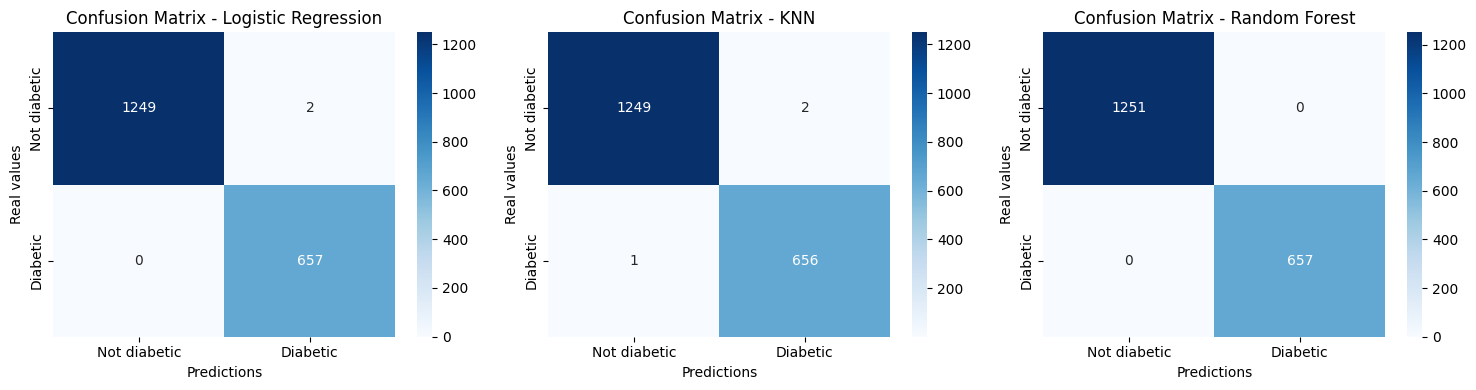

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Définition de la fonction de tracé des matrices de confusion
def plot_confusion_matrices(models, X_test, y_test):
    fig, axes = plt.subplots(1, len(models), figsize=(15, 4))

    for ax, (name, model) in zip(axes, models.items()):
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)

        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=["Not diabetic", "Diabetic"],
                    yticklabels=["Not diabetic", "Diabetic"], ax=ax)
        
        ax.set_xlabel("Predictions")
        ax.set_ylabel("Real values")
        ax.set_title(f"Confusion Matrix - {name}")

    plt.tight_layout()
    plt.show()

# Appel de la fonction pour afficher les matrices de confusion
plot_confusion_matrices(models, X_test, y_test)


In [85]:
# Séparer en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialisation des modèles
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Stocker les performances des modèles
performance = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
    
    performance[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else None
    }

# Convertir en DataFrame pour affichage
performance_df = pd.DataFrame(performance).T
performance_df

Accuracy  Precision    Recall  F1-score   ROC AUC
Logistic Regression  0.995283    1.00000  0.986301  0.993103  1.000000
KNN                  0.998428    0.99696  0.998478  0.997719  0.999994
Random Forest        1.000000    1.00000  1.000000  1.000000  1.000000

# OPTIMIZATION

In [86]:
from sklearn.model_selection import GridSearchCV

# Définition des grilles de recherche pour chaque modèle
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10, 100],  # Régularisation
        "penalty": ["l1", "l2"],  # Type de pénalité
        "solver": ["liblinear"]  # Compatible avec L1 et L2
    },
    "KNN": {
        "n_neighbors": [3, 5, 7, 9, 11],  # Nombre de voisins
        "metric": ["euclidean", "manhattan"]  # Type de distance
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],  # Nombre d'arbres
        "max_depth": [None, 10, 20, 30],  # Profondeur de l'arbre
        "criterion": ["gini", "entropy"]  # Critère d'impureté
    }
}

# Initialisation des modèles
base_models = {
    "Logistic Regression": LogisticRegression(random_state=42, class_weight="balanced"),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight="balanced")
}

# Stockage des meilleurs modèles et scores
best_models = {}
best_params = {}

# Optimisation des hyperparamètres
for name, model in base_models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring="f1", n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Stocker le meilleur modèle et ses paramètres
    best_models[name] = grid_search.best_estimator_
    best_params[name] = grid_search.best_params_

    print(f"{name} - Best Params: {grid_search.best_params_}")


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increas

Logistic Regression - Best Params: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
KNN - Best Params: {'metric': 'euclidean', 'n_neighbors': 3}
Random Forest - Best Params: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 50}


In [87]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Définition des meilleurs modèles trouvés avec GridSearch
best_models = {
    "Logistic Regression": LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=42, class_weight="balanced"),
    "KNN": KNeighborsClassifier(n_neighbors=11, metric='manhattan'),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=20, criterion='entropy', random_state=42, class_weight="balanced")
}

# Évaluation des modèles avec k-fold cross-validation
cv_results = {}

for name, model in best_models.items():
    scores = cross_val_score(model, X_scaled, y, cv=kfold, scoring='f1')
    cv_results[name] = scores

cv_results

{'Logistic Regression': array([0.99847793, 0.99848024, 0.99848024, 0.99847793, 0.99847793]),
 'KNN': array([0.99847561, 0.99847561, 1.        , 0.99923722, 0.99618029]),
 'Random Forest': array([1., 1., 1., 1., 1.])}

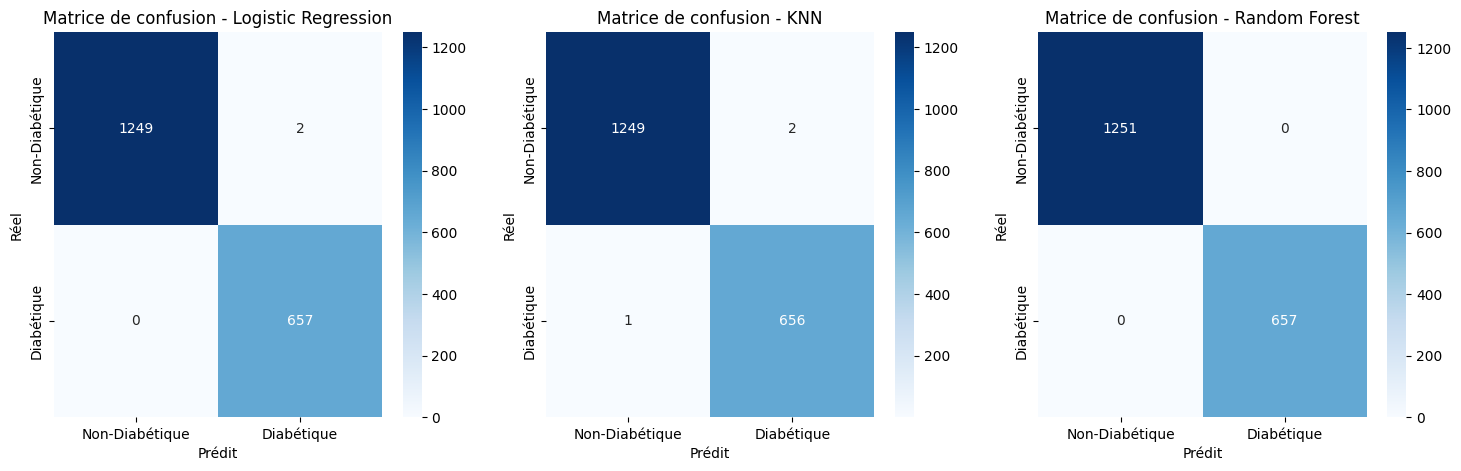

In [88]:
# Entraîner les modèles optimisés sur l'ensemble d'entraînement
for name, model in best_models.items():
    model.fit(X_train_scaled, y_train)

# Générer les matrices de confusion
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, (name, model) in enumerate(best_models.items()):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    
    # Tracer la matrice de confusion
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Diabétique", "Diabétique"], yticklabels=["Non-Diabétique", "Diabétique"], ax=axes[i])
    axes[i].set_title(f"Matrice de confusion - {name}")
    axes[i].set_xlabel("Prédit")
    axes[i].set_ylabel("Réel")

# Afficher les matrices de confusion
plt.show()


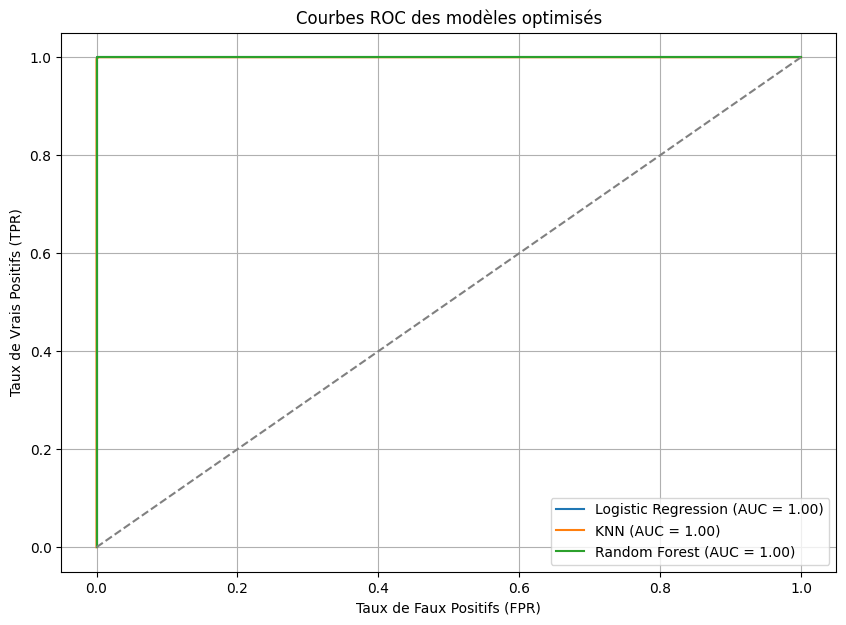

In [89]:
from sklearn.metrics import roc_curve, auc

# Tracer les courbes ROC pour chaque modèle
plt.figure(figsize=(10, 7))

for name, model in best_models.items():
    # Probabilités prédites
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calcul des courbes ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Tracer la courbe
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Ajouter la ligne de référence (aléatoire)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

# Configuration du graphique
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbes ROC des modèles optimisés")
plt.legend()
plt.grid()

# Afficher la courbe
plt.show()
